In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from bs4 import BeautifulSoup

In [2]:
df=pd.read_csv('tags.csv')

In [3]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head(10)

,title,body,tags,score
0,SQL Server 2005: Nullable Foreign Key Constraint,<p>I have a foreign key constraint between tab...,sql|linq|linq-to-sql|constraints|foreign-keys,14
1,Sharing login credentials between ColdFusion s...,<p>If I have multiple CF8 servers can a user l...,coldfusion,3
2,Need an example for using Junit in Intellij Idea,<p>Maybe it's just me but I cannot understand ...,junit|intellij-idea,7
3,split a multi-page pdf file into multiple pdf ...,<p>I'd like to take a multi-page pdf file and ...,python|pdf,19
4,Why does this implementation of strlen() work?,<p><sub>(Disclaimer: I've seen <a href= http:/...,c|undefined-behavior,17
5,Multiple images per Model,<p>I'm writing a simple real-estate listing ap...,django|django-models,39
6,Emacs and Python,<p>I recently started learning <a href= http:/...,python|emacs,33
7,NSData and UIImage,<p>I am trying to load <code>UIImage</code> ob...,ios|iphone|cocoa-touch|uiimage|nsdata,50
8,Does a List<T> guarantee that items will be re...,<p>Does a <code>List&lt;T&gt;</code> always gu...,.net|list|collections,47
9,Is it safe to inject an EJB into a servlet as ...,<p>We all know that in the web tier there is t...,servlets|ejb-3.0|code-injection,11


In [4]:
df.isnull().sum()

title    11132
body         0
tags     11132
score        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   88868 non-null   object
 1   body    100000 non-null  object
 2   tags    88868 non-null   object
 3   score   100000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [6]:
df['tags'].describe()

count                 88868
unique                60983
top       javascript|jquery
freq                    613
Name: tags, dtype: object

In [7]:
df=df.fillna("")

Text(0.5, 1.0, 'Ratio of missing values per columns')

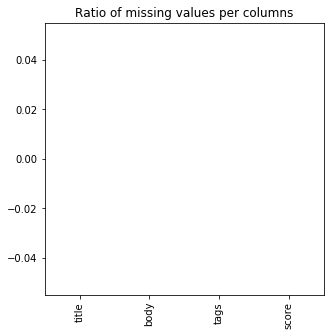

In [8]:
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).plot.bar()
plt.title("Ratio of missing values per columns")

In [9]:
a=df['tags'][7]
a.split('|')

['ios', 'iphone', 'cocoa-touch', 'uiimage', 'nsdata']

In [10]:
df['tags'] = df['tags'].apply(lambda x: x.split('|'))
df

,title,body,tags,score
0,SQL Server 2005: Nullable Foreign Key Constraint,<p>I have a foreign key constraint between tab...,"[sql, linq, linq-to-sql, constraints, foreign-...",14
1,Sharing login credentials between ColdFusion s...,<p>If I have multiple CF8 servers can a user l...,[coldfusion],3
2,Need an example for using Junit in Intellij Idea,<p>Maybe it's just me but I cannot understand ...,"[junit, intellij-idea]",7
3,split a multi-page pdf file into multiple pdf ...,<p>I'd like to take a multi-page pdf file and ...,"[python, pdf]",19
4,Why does this implementation of strlen() work?,<p><sub>(Disclaimer: I've seen <a href= http:/...,"[c, undefined-behavior]",17
...,...,...,...,...
99995,How to separate date and time using php from d...,<p>How to convert this string</p> <pre><code>$...,"[php, datetime]",1
99996,Chamilo 2.1 - How to create new themes properly?,<p>I am new to Chamilo 2.1 which is an open-so...,"[php, content-management-system, themes]",2
99997,Templated string class use of strcmp strcpy an...,<p>I overheard sometime ago a discussion about...,"[c++, string, utf-8, implementation, utf-16]",3
99998,regex php: find everything in div,<p>I'm trying to find eveything inside a div u...,"[php, regex, html, extract]",3


In [11]:
list_all_tags = [item for sublist in df['tags'].values for item in sublist]
len(list_all_tags)

273189

In [12]:
unique_tags=set(list_all_tags)
len(unique_tags)

16062

In [52]:
tags_string=','.join(list_all_tags)
tags_string

'sql,linq,linq-to-sql,constraints,foreign-keys,coldfusion,junit,intellij-idea,python,pdf,c,undefined-behavior,django,django-models,python,emacs,ios,iphone,cocoa-touch,uiimage,nsdata,.net,list,collections,servlets,ejb-3.0,code-injection,javascript,firefox,xul,apache,.htaccess,url-rewriting,iphone,memory-leaks,static-analysis,clang,php,html,file,save,php,forms,post,http-headers,c#,linq,.net,windows,fonts,svn,javascript,json,svn,git,merge,branch,git-svn,javascript,arrays,object,java,performance,file-io,jni,production,mysql,ruby-on-rails,unicode,encoding,utf-8,c++,file,file-io,algorithm,time-complexity,shortest-path,c#,.net,serialization,dictionary,c++,design-patterns,php,oop,css,design,frameworks,project-management,agile,scrum,html,image,caching,browser-cache,image-caching,objective-c,cocoa,delphi,memory-leaks,profiling,security,disk,c,string,concatenation,wpf,data-binding,architecture,mvvm,dependency-properties,agile,feature-driven,design,user-interface,datatable,php,mysql,arrays,math,ja

In [53]:
keywords = nltk.FreqDist(list_all_tags)
frequency_dist=keywords.most_common(101)[1:]
top_100_tags=[freq[0] for freq in frequency_dist]
del keywords['']
keywords

FreqDist({'javascript': 8904, 'java': 7858, 'c#': 7854, 'php': 7153, 'jquery': 6057, 'android': 5281, 'python': 4584, 'html': 4427, 'c++': 3906, 'css': 3249, ...})

In [47]:

keywords

FreqDist({'javascript': 8904, 'java': 7858, 'c#': 7854, 'php': 7153, 'jquery': 6057, 'android': 5281, 'python': 4584, 'html': 4427, 'c++': 3906, 'css': 3249, ...})

In [48]:
from wordcloud import WordCloud

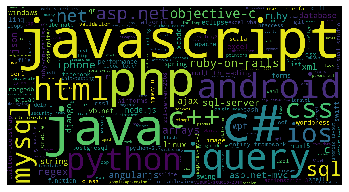

In [59]:
wordcloud = WordCloud(width=1500, height=800).generate_from_frequencies(keywords)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('top_100_tags.png')
plt.show()

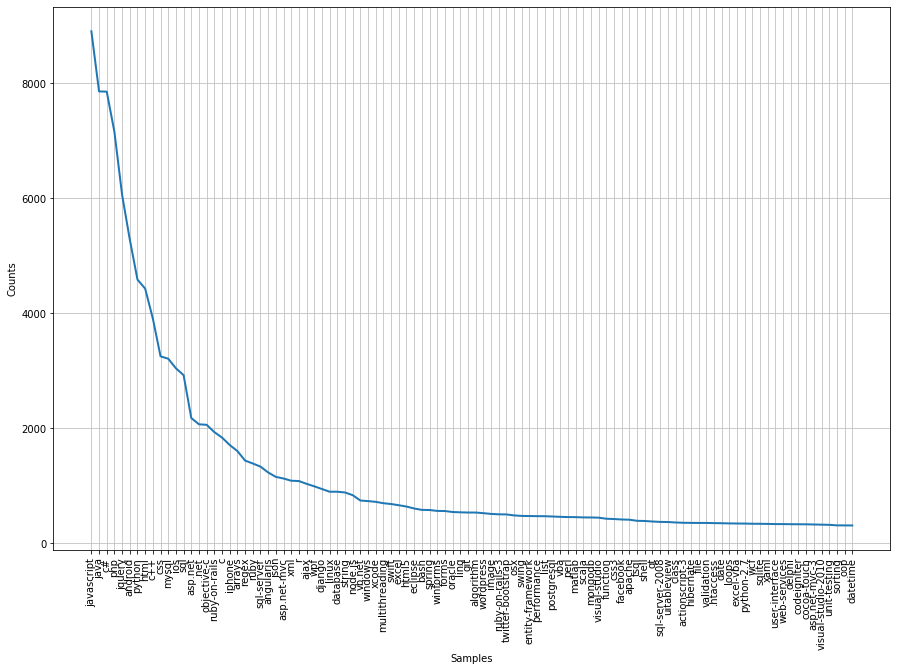

In [67]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100)
fig.savefig('trends.png')
#plt.savefig('trends.png',transparent=True)

In [15]:
def most_common(tags):
    tags_filtered = []
    for i in range(len(tags)):
        if tags[i] in top_100_tags:
            tags_filtered.append(tags[i])
    return tags_filtered

In [16]:
df['tags']=df['tags'].apply(lambda x:most_common(x))
df['tags'] = df['tags'].apply(lambda x: x if len(x)>0 else None)

In [17]:
df.dropna(subset=['tags'],inplace=True)

In [18]:
df_tag=df
df_tag

,title,body,tags,score
0,SQL Server 2005: Nullable Foreign Key Constraint,<p>I have a foreign key constraint between tab...,"[sql, linq]",14
3,split a multi-page pdf file into multiple pdf ...,<p>I'd like to take a multi-page pdf file and ...,[python],19
4,Why does this implementation of strlen() work?,<p><sub>(Disclaimer: I've seen <a href= http:/...,[c],17
5,Multiple images per Model,<p>I'm writing a simple real-estate listing ap...,[django],39
6,Emacs and Python,<p>I recently started learning <a href= http:/...,[python],33
...,...,...,...,...
99995,How to separate date and time using php from d...,<p>How to convert this string</p> <pre><code>$...,"[php, datetime]",1
99996,Chamilo 2.1 - How to create new themes properly?,<p>I am new to Chamilo 2.1 which is an open-so...,[php],2
99997,Templated string class use of strcmp strcpy an...,<p>I overheard sometime ago a discussion about...,"[c++, string]",3
99998,regex php: find everything in div,<p>I'm trying to find eveything inside a div u...,"[php, regex, html]",3


In [19]:
df_tag['body'] = df_tag['body'].apply(lambda x: BeautifulSoup(x).get_text()) 
df_tag

,title,body,tags,score
0,SQL Server 2005: Nullable Foreign Key Constraint,I have a foreign key constraint between tables...,"[sql, linq]",14
3,split a multi-page pdf file into multiple pdf ...,I'd like to take a multi-page pdf file and cre...,[python],19
4,Why does this implementation of strlen() work?,(Disclaimer: I've seen this question and I am ...,[c],17
5,Multiple images per Model,I'm writing a simple real-estate listing app i...,[django],39
6,Emacs and Python,I recently started learning Emacs. I went thro...,[python],33
...,...,...,...,...
99995,How to separate date and time using php from d...,How to convert this string $parent = 2011-08-0...,"[php, datetime]",1
99996,Chamilo 2.1 - How to create new themes properly?,I am new to Chamilo 2.1 which is an open-sourc...,[php],2
99997,Templated string class use of strcmp strcpy an...,I overheard sometime ago a discussion about ho...,"[c++, string]",3
99998,regex php: find everything in div,I'm trying to find eveything inside a div usin...,"[php, regex, html]",3


In [20]:
df_tag=df_tag[df_tag['score']>5]
df_tag

,title,body,tags,score
0,SQL Server 2005: Nullable Foreign Key Constraint,I have a foreign key constraint between tables...,"[sql, linq]",14
3,split a multi-page pdf file into multiple pdf ...,I'd like to take a multi-page pdf file and cre...,[python],19
4,Why does this implementation of strlen() work?,(Disclaimer: I've seen this question and I am ...,[c],17
5,Multiple images per Model,I'm writing a simple real-estate listing app i...,[django],39
6,Emacs and Python,I recently started learning Emacs. I went thro...,[python],33
...,...,...,...,...
99936,Clang couldn't infer template argument whereas...,I have been trying to compile a project (which...,[c++],18
99940,Uploading a large file (up to 100gb) throught ...,I need to somehow implement an ability to uplo...,"[c#, asp.net, asp.net-mvc]",6
99987,Copy text from Android AlertDialog?,Is there any way to make the text in an AlertD...,[android],6
99988,Where do I put classes in Symfony that are nei...,For my application bundle I will need some cla...,[php],8
